# Tutorial 1: System Manipulation and Atom Selection

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Authors: 

- Dr Micaela Matta - micaela.matta@kcl.ac.uk 
- Dr Richard Gowers - richardjgowers@gmail.com
- Dr Irfan Alibay - ialibay@gmail.com

This notebook is adapted from materials developed for the [2022 CCPBioSim Workshop](https://github.com/MDAnalysis/WorkshopMDMLEdinburgh2022), which was in turn adapted from the [2021 PRACE Workshop](https://github.com/MDAnalysis/WorkshopPrace2021) and the [2018 Workshop/Hackathon](https://github.com/MDAnalysis/WorkshopHackathon2018).

## Google Colab package installs

This installs the necessary packages for Google Colab. **Please only run these if you are using Colab.**

### **Jupyter cheat sheet**:
- to run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- to get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

<div class="alert alert-warning"><b> REMEMBER: variables persist between cells</b> 
    
Be aware that it is the order of execution of cells that is important in a Jupyter notebook, not the <em>order</em> in which they appear. Python will remember <em>all</em> the code that was run previously, including any variables you have defined, irrespective of the order in the notebook. Therefore if you define variables lower down the notebook and then (re)run cells further up, those defined further down will still be present. </div> 

## Learning outcomes:
* How to load your molecular simulation data into MDAnalysis
* Basic features of the `MDAnalysis.Universe`
* Visualise your simulation data with `nglview`
* Working with `AtomGroup`s
* Select atoms of interest using `select_atoms`
* Selecting bonds


**This notebook introduces the fundamental objects of `MDAnalysis`:**

 - the `Universe`,
 - `AtomGroup`, and `Atom` objects.
 - selecting and manipulating `AtomGroup`s
 - `Residue`s and `Segment`s
 - `Bond` `Angle` and `Dihedral`


**Additional resources**
 - During the workshop, feel free to ask questions at any time
 - For more on how to use MDAnalysis, see the [User Guide](https://userguide.mdanalysis.org/2.0.0-dev0/) and [documentation](https://docs.mdanalysis.org/2.0.0-dev0/)
 - Ask questions on the [user mailing list](https://groups.google.com/group/mdnalysis-discussion) or on [Discord](https://discord.gg/fXTSfDJyxE)
 - Report bugs on [GitHub](https://github.com/MDAnalysis/mdanalysis/issues?)

## Table of Contents

1. [Fundamental MDAnalysis objects](#fundamentals)  
2. [Selecting Atoms](#selections)    
3. [Visualising systems](#visualisation)     
4. [Bonds, angles and dihedrals](#bonds)
5. [Transformations](#transformations)

<a id='fundamentals'></a>
# 1. Fundamental MDAnalysis objects


## Universe loading 101

> "If you wish to make an apple pie from scratch, you must first invent the Universe." 

> ~ Carl Sagan

First, we need to import `MDAnalysis`, giving us access to all the components in its namespace:

In [1]:
import MDAnalysis as mda

One of the most fundamental objects in the `MDAnalysis` data model is the `Universe` object.
A `Universe` can be thought of as an interface to all the data of a simulation;
it contains all of a simulations' topology information (names, charges, masses etc) at the least,
but usually also includes trajectory information (positions, velocities etc) as well.

In order to do anything, we do need some actual molecular dynamics data to work with. Let's load an example (the protein adenylate kinase, or AdK) from the MDAnalysis tests data:

In [2]:
from MDAnalysis.tests.datafiles import PSF, DCD

To make a `Universe`, we need at the very least a topology file - see the [topology readers](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/topology/init.html) documentation for a list of supported file formats. 

Since the type of topology file we're using in this example (a PSF file) doesn't contain coordinates, we'll also need to load a trajectory file (in this case a DCD file) so we have some position data to work with later. You'll learn more about working with trajectories in the next session. 


In [3]:
u = mda.Universe(PSF, DCD)

print(u)

<Universe with 3341 atoms>


## AtomGroups

We now have a `Universe` object. Since the topology (PSF) file we loaded contained both atom identities and bond information, the `Universe` is able to access these details.



We can access all atoms in the `Universe` through the `Universe.atoms` attribute.
This returns an `AtomGroup`, which is probably the most important class we will learn about.

In [4]:
ag = u.atoms
type(ag)

MDAnalysis.core.groups.AtomGroup

An `AtomGroup` is like an array of atoms, and offers access to the data of these atoms through various attributes:

In [5]:
ag.indices

array([   0,    1,    2, ..., 3338, 3339, 3340], dtype=int64)

In [6]:
ag.names

array(['N', 'HT1', 'HT2', ..., 'C', 'OT1', 'OT2'], dtype=object)

In [7]:
ag.resnames

array(['MET', 'MET', 'MET', ..., 'GLY', 'GLY', 'GLY'], dtype=object)

In [8]:
ag.resids

array([  1,   1,   1, ..., 214, 214, 214])

In [9]:
ag.charges

array([-0.30000001,  0.33000001,  0.33000001, ...,  0.34      ,
       -0.67000002, -0.67000002])

In [10]:
ag.masses

array([14.007,  1.008,  1.008, ..., 12.011, 15.999, 15.999])

In [11]:
ag.types

array(['56', '2', '2', ..., '32', '72', '72'], dtype=object)

All of these attributes of an `AtomGroup` return numpy arrays of the same length as the `AtomGroup` itself;
that is, each element corresponds to each atom in the `AtomGroup`, in order.

In [12]:
print(ag.n_atoms)
print(len(ag.names))

3341
3341


In general, `MDAnalysis` will try and extract as much information as possible from the files given to `Universe`. The [topology readers](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/topology/init.html) documentation lists the attributes that are extracted from each filetype.

## Working with individual atoms

By slicing an `AtomGroup` we can access individual `Atom` objects.
These `Atom` objects will have singular versions of the various attributes of `AtomGroup`s.

In general working with individual `Atom` objects is discouraged as it is inefficient and will lead to poor performance.

In [13]:
u = mda.Universe(PSF, DCD)
a = u.atoms[0]
print(a)

<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>


In [14]:
print("name:", a.name)
print("resid:", a.resid)
print("resname:", a.resname)

name: N
resid: 1
resname: MET


In [15]:
b = u.atoms[1:4]
print(b)

<AtomGroup [<Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>]>


In [16]:
print("name:", b.names)
print("resid:", b.resids)
print("resname:", b.resnames)

name: ['HT1' 'HT2' 'HT3']
resid: [1 1 1]
resname: ['MET' 'MET' 'MET']


## ResidueGroups and SegmentGroups

The `Universe` also gives higher-order topology objects, including `ResidueGroups` and `SegmentGroups`. We can access all residues in the `Universe` with:

In [17]:
u.residues

<ResidueGroup with 214 residues>

And all segments with:

In [18]:
u.segments

<SegmentGroup with 1 segment>

`ResidueGroups` and `SegmentGroups` also behave similarly to `AtomGroups`, with many of their methods returning `numpy` arrays with each element corresponding to a single residue or segment, respectively.

In [19]:
u.residues.resnames

array(['MET', 'ARG', 'ILE', 'ILE', 'LEU', 'LEU', 'GLY', 'ALA', 'PRO',
       'GLY', 'ALA', 'GLY', 'LYS', 'GLY', 'THR', 'GLN', 'ALA', 'GLN',
       'PHE', 'ILE', 'MET', 'GLU', 'LYS', 'TYR', 'GLY', 'ILE', 'PRO',
       'GLN', 'ILE', 'SER', 'THR', 'GLY', 'ASP', 'MET', 'LEU', 'ARG',
       'ALA', 'ALA', 'VAL', 'LYS', 'SER', 'GLY', 'SER', 'GLU', 'LEU',
       'GLY', 'LYS', 'GLN', 'ALA', 'LYS', 'ASP', 'ILE', 'MET', 'ASP',
       'ALA', 'GLY', 'LYS', 'LEU', 'VAL', 'THR', 'ASP', 'GLU', 'LEU',
       'VAL', 'ILE', 'ALA', 'LEU', 'VAL', 'LYS', 'GLU', 'ARG', 'ILE',
       'ALA', 'GLN', 'GLU', 'ASP', 'CYS', 'ARG', 'ASN', 'GLY', 'PHE',
       'LEU', 'LEU', 'ASP', 'GLY', 'PHE', 'PRO', 'ARG', 'THR', 'ILE',
       'PRO', 'GLN', 'ALA', 'ASP', 'ALA', 'MET', 'LYS', 'GLU', 'ALA',
       'GLY', 'ILE', 'ASN', 'VAL', 'ASP', 'TYR', 'VAL', 'LEU', 'GLU',
       'PHE', 'ASP', 'VAL', 'PRO', 'ASP', 'GLU', 'LEU', 'ILE', 'VAL',
       'ASP', 'ARG', 'ILE', 'VAL', 'GLY', 'ARG', 'ARG', 'VAL', 'HSD',
       'ALA', 'PRO',

In [20]:
u.residues.resnames[:20]

array(['MET', 'ARG', 'ILE', 'ILE', 'LEU', 'LEU', 'GLY', 'ALA', 'PRO',
       'GLY', 'ALA', 'GLY', 'LYS', 'GLY', 'THR', 'GLN', 'ALA', 'GLN',
       'PHE', 'ILE'], dtype=object)

In [21]:
u.segments.segids

array(['4AKE'], dtype=object)

You can also create a `ResidueGroup` from an `AtomGroup`:

In [22]:
rg = ag.residues
print(rg.resnames)

['MET' 'ARG' 'ILE' 'ILE' 'LEU' 'LEU' 'GLY' 'ALA' 'PRO' 'GLY' 'ALA' 'GLY'
 'LYS' 'GLY' 'THR' 'GLN' 'ALA' 'GLN' 'PHE' 'ILE' 'MET' 'GLU' 'LYS' 'TYR'
 'GLY' 'ILE' 'PRO' 'GLN' 'ILE' 'SER' 'THR' 'GLY' 'ASP' 'MET' 'LEU' 'ARG'
 'ALA' 'ALA' 'VAL' 'LYS' 'SER' 'GLY' 'SER' 'GLU' 'LEU' 'GLY' 'LYS' 'GLN'
 'ALA' 'LYS' 'ASP' 'ILE' 'MET' 'ASP' 'ALA' 'GLY' 'LYS' 'LEU' 'VAL' 'THR'
 'ASP' 'GLU' 'LEU' 'VAL' 'ILE' 'ALA' 'LEU' 'VAL' 'LYS' 'GLU' 'ARG' 'ILE'
 'ALA' 'GLN' 'GLU' 'ASP' 'CYS' 'ARG' 'ASN' 'GLY' 'PHE' 'LEU' 'LEU' 'ASP'
 'GLY' 'PHE' 'PRO' 'ARG' 'THR' 'ILE' 'PRO' 'GLN' 'ALA' 'ASP' 'ALA' 'MET'
 'LYS' 'GLU' 'ALA' 'GLY' 'ILE' 'ASN' 'VAL' 'ASP' 'TYR' 'VAL' 'LEU' 'GLU'
 'PHE' 'ASP' 'VAL' 'PRO' 'ASP' 'GLU' 'LEU' 'ILE' 'VAL' 'ASP' 'ARG' 'ILE'
 'VAL' 'GLY' 'ARG' 'ARG' 'VAL' 'HSD' 'ALA' 'PRO' 'SER' 'GLY' 'ARG' 'VAL'
 'TYR' 'HSD' 'VAL' 'LYS' 'PHE' 'ASN' 'PRO' 'PRO' 'LYS' 'VAL' 'GLU' 'GLY'
 'LYS' 'ASP' 'ASP' 'VAL' 'THR' 'GLY' 'GLU' 'GLU' 'LEU' 'THR' 'THR' 'ARG'
 'LYS' 'ASP' 'ASP' 'GLN' 'GLU' 'GLU' 'THR' 'VAL' 'A

## Exercise 1

### 1a. Load the GRO topology file from `MDAnalysis.tests.datafiles` and count how many atoms, residues and segments it contains.**

In [23]:
# Exercise 1a

### Solution 1a

In [24]:
from MDAnalysis.tests.datafiles import GRO
u_gro = mda.Universe(GRO)
print('Atoms: ', u_gro.atoms.n_atoms)
print('Residues: ', u_gro.residues.n_residues)
print('Segments: ', u_gro.segments.n_segments)

Atoms:  47681
Residues:  11302
Segments:  1


### 1b. From the above universe, find the name of the:
  - first segment
  - last atom
  - 10th residue.

In [25]:
# Exercise 1b
print("Last atom: ", u_gro.atoms[-1].name)
print('First segment:', u_gro.segments[0].segid)
print('115th residue: ', u_gro.residues[114].resname)

Last atom:  NA
First segment: SYSTEM
115th residue:  LEU


### Solution 1b

In [26]:
print('First segment:', u_gro.segments[0].segid)
print('Last atom: ', u_gro.atoms[-1].name)
print('10th residue: ', u_gro.residues[9].resname)

First segment: SYSTEM
Last atom:  NA
10th residue:  GLY


<a id='selections'></a>
# 2. Selecting atoms

It is also rare that we want to operate on all atoms in the system!

`MDAnalysis` offers a few different ways to select atoms,
in this section we will go over the most useful methods.

## Numpy style selections

As previously mentioned, an `AtomGroup` is like an array of atoms,
and therefore we can slice it exactly like we would slice a `numpy` array.

### Fancy indexing

The simplest option to select specific atom is to use fancy indexing. You can specify the atoms in a list

In [27]:
u = mda.Universe(PSF, DCD)
u.atoms[[1, 4, 5 , 0]]

<AtomGroup with 4 atoms>

or as a range

In [28]:
u.atoms[1:10]

<AtomGroup with 9 atoms>

### Boolean indexing

You can also create an array with `True`/`False` values of the same length as the `AtomGroup`. Every atom for which the array is set to `True` will be selected.

We can create such a boolean array by doing a comparison of a `numpy` array:

In [29]:
selection_ar = u.atoms.resnames == 'GLY'
print("selection array = ", selection_ar)
glys = u.atoms[selection_ar]

selection array =  [False False False ...  True  True  True]


In [30]:
print(len(glys.resids))
glys.resnames

141


array(['GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY',
       'GLY', 'GLY',

or shorter:

In [31]:
print(u.atoms[u.atoms.resnames == 'GLY'].indices)

[ 119  120  121  122  123  124  125  150  151  152  153  154  155  156
  167  168  169  170  171  172  173  196  197  198  199  200  201  202
  375  376  377  378  379  380  381  476  477  478  479  480  481  482
  624  625  626  627  628  629  630  676  677  678  679  680  681  682
  824  825  826  827  828  829  830 1211 1212 1213 1214 1215 1216 1217
 1288 1289 1290 1291 1292 1293 1294 1513 1514 1515 1516 1517 1518 1519
 1866 1867 1868 1869 1870 1871 1872 1989 1990 1991 1992 1993 1994 1995
 2227 2228 2229 2230 2231 2232 2233 2310 2311 2312 2313 2314 2315 2316
 2809 2810 2811 2812 2813 2814 2815 2941 2942 2943 2944 2945 2946 2947
 3079 3080 3081 3082 3083 3084 3085 3333 3334 3335 3336 3337 3338 3339
 3340]


In [32]:
glys = u.atoms[u.atoms.resnames == 'GLY']
print(glys.resnames)

['GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY']


We can also do this with `ResidueGroup`s and `SegmentGroup`s, e.g.:

In [33]:
u.residues[u.residues.resnames == 'GLY']

<ResidueGroup with 20 residues>

## Selection Strings and `select_atoms`

We've already seen that complex selections can be performed on `AtomGroups` using numpy style indexing.
However, `MDAnalysis` also features a CHARMM-style atom selection mechanism that is often more convenient.
We can consult the docstring for `select_atoms` to see the available selection keywords:

In [34]:
u.atoms.select_atoms?

You can also see them in the docs [here](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html).

Although boolean selections work well enough for selecting out atoms from AtomGroups, the selection language makes more complex selections possible with probably less effort.

For example, we can select all glycines by:

In [35]:
glycines = u.select_atoms("resname GLY")
glycines.masses

array([14.007,  1.008, 12.011,  1.008,  1.008, 12.011, 15.999, 14.007,
        1.008, 12.011,  1.008,  1.008, 12.011, 15.999, 14.007,  1.008,
       12.011,  1.008,  1.008, 12.011, 15.999, 14.007,  1.008, 12.011,
        1.008,  1.008, 12.011, 15.999, 14.007,  1.008, 12.011,  1.008,
        1.008, 12.011, 15.999, 14.007,  1.008, 12.011,  1.008,  1.008,
       12.011, 15.999, 14.007,  1.008, 12.011,  1.008,  1.008, 12.011,
       15.999, 14.007,  1.008, 12.011,  1.008,  1.008, 12.011, 15.999,
       14.007,  1.008, 12.011,  1.008,  1.008, 12.011, 15.999, 14.007,
        1.008, 12.011,  1.008,  1.008, 12.011, 15.999, 14.007,  1.008,
       12.011,  1.008,  1.008, 12.011, 15.999, 14.007,  1.008, 12.011,
        1.008,  1.008, 12.011, 15.999, 14.007,  1.008, 12.011,  1.008,
        1.008, 12.011, 15.999, 14.007,  1.008, 12.011,  1.008,  1.008,
       12.011, 15.999, 14.007,  1.008, 12.011,  1.008,  1.008, 12.011,
       15.999, 14.007,  1.008, 12.011,  1.008,  1.008, 12.011, 15.999,
      

If selecting by residue number, we can specify a range:

In [36]:
first10resids = u.select_atoms("resid 1-10")
print(first10resids.resnames)

['MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG'
 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG'
 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ARG' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE'
 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE'
 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE'
 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'ILE' 'LEU' 'LEU' 'LEU'
 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU'
 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU'
 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'GLY'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'ALA' 'ALA' 'ALA' 'ALA' 'ALA' 'ALA'
 'ALA' 'ALA' 'ALA' 'ALA' 'PRO' 'PRO' 'PRO' 'PRO' 'PRO' 'PRO' 'PRO' 'PRO'
 'PRO' 'PRO' 'PRO' 'PRO' 'PRO' 'PRO' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY'
 'GLY']


We can use `and`/`or`/`not` with [logical conjunctions](https://en.wikipedia.org/wiki/Logical_conjunction):

In [37]:
acidic = u.select_atoms("resname GLU or resname ASP")
acidic.resnames

array(['GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'ASP', 'ASP', 'ASP',
       'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'ASP', 'ASP', 'ASP',
       'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP',
       'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP',
       'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP',
       'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'ASP', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU',
       'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'GLU', 'ASP', 'ASP', 'ASP',
       'ASP', 'ASP',

For name like selections, we can also Unix shell-style wildcards such as `*`. Here for example `name OD*` would select atoms named `OD1, OD2, OD3` etc:

In [38]:
acidic_o = acidic.select_atoms('name OD* or name OE*')
acidic_o.names

array(['OE1', 'OE2', 'OD1', 'OD2', 'OE1', 'OE2', 'OD1', 'OD2', 'OD1',
       'OD2', 'OD1', 'OD2', 'OE1', 'OE2', 'OE1', 'OE2', 'OE1', 'OE2',
       'OD1', 'OD2', 'OD1', 'OD2', 'OD1', 'OD2', 'OE1', 'OE2', 'OD1',
       'OD2', 'OE1', 'OE2', 'OD1', 'OD2', 'OD1', 'OD2', 'OE1', 'OE2',
       'OD1', 'OD2', 'OE1', 'OE2', 'OD1', 'OD2', 'OD1', 'OD2', 'OE1',
       'OE2', 'OE1', 'OE2', 'OD1', 'OD2', 'OD1', 'OD2', 'OE1', 'OE2',
       'OE1', 'OE2', 'OE1', 'OE2', 'OE1', 'OE2', 'OE1', 'OE2', 'OD1',
       'OD2', 'OE1', 'OE2', 'OD1', 'OD2', 'OE1', 'OE2'], dtype=object)

As a shortcut, multiple values can be given and these will be implicitly OR'd together.
To select all atoms with name NZ or NH* in residues named LYS or ARG:

In [39]:
basic_n = u.select_atoms("(resname LYS ARG) and (name NZ NH*)")
basic_n

<AtomGroup with 44 atoms>

There are also several preset keywords for useful selections such as `backbone`, which selects all CA, C, O and N atoms:

In [40]:
backbone_1 = u.select_atoms('backbone')
backbone_2 = u.select_atoms('name CA C O N')
backbone_1 == backbone_2

True

### Geometric selections

The `select_atoms` method also has various geometric keywords that make selecting atoms based on geometric criteria much easier.

For example, we can look for salt bridges by using the `around` selection operator to specify only atoms within 4 angstroms of a particular selection. Note we can simplify selection strings by referring to previous `AtomGroups`.

In [41]:
acidic = u.select_atoms("group acidic and around 4 group basic", acidic=acidic_o, basic=basic_n)
acidic

<AtomGroup with 46 atoms>

You can also select atoms based on absolute position using `prop`, e.g.:

In [42]:
upper_z = u.select_atoms('prop z > 10')
upper_z

<AtomGroup with 468 atoms>

## Set operations

`AtomGroup`s can also be combined using `&` for "and" and `|` for "or":

In [43]:
heavy = u.atoms[u.atoms.masses > 10]
arg = u.atoms[u.atoms.resnames == 'ARG']
print(len(heavy), len(arg))
print(len(heavy & arg))
print(len(heavy | arg))

1656 312
143
1825


These two selections are identical:

In [44]:
ag1 = u.atoms.select_atoms('resname LYS ARG')
ag2 = u.atoms.select_atoms('resname LYS') | u.atoms.select_atoms('resname ARG')
ag3 = u.atoms.select_atoms('resname LYS') & u.atoms.select_atoms('resname ARG')
ag1 == ag2
ag1 == ag3

False

We can also concatenate atomgroups with `+` and subtract with `-`; the following two selections are also identical: 

In [45]:
no_H1 = u.atoms.select_atoms('resname LYS ARG and not name H*')
no_H2 = u.atoms.select_atoms('resname LYS ARG') + u.atoms.select_atoms('name H*')

no_H1 == no_H2

False

By design, an `AtomGroup` can have repeats of the same atom, for example through this selection:

In [46]:
ag = u.atoms[[0, 0, 1, 2, 4, 4, 5]]
ag

<AtomGroup with 7 atoms>

The `unique` property will return a version of the `AtomGroup` with only one of each Atom:

In [47]:
ag.unique

<AtomGroup with 5 atoms>

## Exercise 2

### 2a. Select residues 100 to 200, first using indexing and then using a selection string, and confirm you get the same selection.

In [48]:
# Exercise 2a
res_sel1 = u.residues[99:200]
print(res_sel1)
res_sel2 = u.select_atoms('resid 100-200').residues

res_sel1 == res_sel2


<ResidueGroup [<Residue GLY, 100>, <Residue ILE, 101>, <Residue ASN, 102>, ..., <Residue GLY, 198>, <Residue THR, 199>, <Residue LYS, 200>]>


True

### Solution 2a

In [49]:
ag1 = u.residues[99:200]
ag2 = u.select_atoms("resid 100-200").residues
ag1 == ag2

True

What might be some reasons to prefer one method over the other?

### 2b. Count the number of arginine residues

In [50]:
# Exercise 2b
arg = u.select_atoms("resname ARG")
print(len(arg.residues))
print(len(arg))

13
312


### Solution 2b

In [51]:
ag = u.select_atoms('resname ARG')
print(len(ag.residues))

13


### 2c. Select all nitrogen atoms within 5.0A of an alpha carbon atom

In [52]:
# Exercise 2c
N = u.select_atoms("name N* and around 5 name CA")
print(N)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 20: N of type 54 of resname ARG, resid 2 and segid 4AKE>, <Atom 33: NE of type 57 of resname ARG, resid 2 and segid 4AKE>, ..., <Atom 3296: N of type 54 of resname ILE, resid 212 and segid 4AKE>, <Atom 3315: N of type 54 of resname LEU, resid 213 and segid 4AKE>, <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>]>


### Solution 2c

In [53]:
ag = u.select_atoms('name N* and around 5 name CA')
print(ag)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 20: N of type 54 of resname ARG, resid 2 and segid 4AKE>, <Atom 33: NE of type 57 of resname ARG, resid 2 and segid 4AKE>, ..., <Atom 3296: N of type 54 of resname ILE, resid 212 and segid 4AKE>, <Atom 3315: N of type 54 of resname LEU, resid 213 and segid 4AKE>, <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>]>


### 2d. Select all hydrogens that are bonded to an alpha carbon

*Hint: Look through the `select_atoms` docstring above or [here](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) for keywords that might help!*

In [54]:
# Exercise 2d

### Solution 2d

In [55]:
ag = u.select_atoms('name H* and bonded name CA')
print(ag)

<AtomGroup [<Atom 6: HA of type 6 of resname MET, resid 1 and segid 4AKE>, <Atom 23: HA of type 6 of resname ARG, resid 2 and segid 4AKE>, <Atom 47: HA of type 6 of resname ILE, resid 3 and segid 4AKE>, ..., <Atom 3318: HA of type 6 of resname LEU, resid 213 and segid 4AKE>, <Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>]>


<a id='visualisation'></a>
# 3. Visualisation with nglview

[nglview](https://github.com/nglviewer/nglview#usage) is a package that allows to visualise a MDAnalysis `Universe` or `AtomGroup` directly on the jupyter notebook. First we load the structure:

In [56]:
import nglview as nv

view_u = nv.show_mdanalysis(u)
view_u.camera = 'orthographic'

And now we can launch the viewer:

In [57]:
view_u

NGLWidget(max_frame=97)

Have a play around - you can rotate, zoom (and play through the trajectory) to view the structure. You can also select atoms to display their information.

nglview can be useful to check that we are indeed selecting the correct `AtomGroup`:

In [58]:
helix_1 = u.select_atoms('resid 12-25')
view_ag = nv.show_mdanalysis(helix_1)

view_ag

NGLWidget(max_frame=97)

To add another selection to the same view:

In [59]:
resid_20 = u.select_atoms('resid 20')
view_ag.add_trajectory(resid_20)

### Exercise 3

Show all atoms that are below the plane x=4.0

In [60]:
# Exercise 3
upper_x = u.select_atoms('prop x < 4')
view_x = nv.show_mdanalysis(upper_x)
view_x



NGLWidget(max_frame=97)

### Solution 3

In [61]:
ag = u.select_atoms('prop x < 4')
view_ex3 = nv.show_mdanalysis(ag)
view_ex3

NGLWidget(max_frame=97)

<a id='bonds'></a>
# 4. Bonds, angles, and dihedrals

We can also get at connectivity information between atoms, such as bonds, angles, and dihedrals.
These are read from the input topology file,
with angle and dihedrals inferred from the bonds present,
i.e. there is a measurable angle between two bonds with a common atom.

For example in a PDB file `CONECT` records are read as bonds,
however if none are present...

In [62]:
from MDAnalysis.tests.datafiles import PDB_small

## Guessing bonds

Bonds are typically read form the topology file,
however if they are not present it is possible to guess these by passing the `guess_bonds=True` keyword argument to `Universe` creation.
This algorithm guesses bonds that are present based upon the positions of particles and their assumed radius.

In [63]:
u = mda.Universe(PDB_small,
                 guess_bonds=True)

C:\Programs\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\topology\PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [64]:
u.atoms.bonds

<TopologyGroup containing 3365 bonds>

In [65]:
u.atoms.angles

<TopologyGroup containing 6123 angles>

In [66]:
u.atoms.dihedrals

<TopologyGroup containing 8921 dihedrals>

Like AtomGroups, these can be sliced to yield individual items:

In [67]:
u.atoms.bonds[3].value()

1.4916038429042136

All of these give the associated measurement, bond length or angle, via the `values()` or `value()` method:

In [68]:
u.atoms.bonds.values()

array([1.03790959, 1.03722839, 1.05421131, ..., 1.53102852, 1.26192749,
       1.26038941])

In [69]:
u.bonds[2].value()

1.054215168443364

In [70]:
u.atoms.bonds[2].value()

1.054215168443364

We can plot the distribution of bond lengths using matplotlib:

(array([ 268.,   94.,  305., 1017.,    0.,  214.,   83.,   16.,  259.,
          86.,  208.,  103.,  672.,   27.,    0.,    0.,    0.,    0.,
          13.]),
 array([0.95964684, 1.00548859, 1.05133034, 1.09717209, 1.14301384,
        1.18885559, 1.23469734, 1.28053909, 1.32638084, 1.37222259,
        1.41806434, 1.46390608, 1.50974783, 1.55558958, 1.60143133,
        1.64727308, 1.69311483, 1.73895658, 1.78479833, 1.83064008]),
 <BarContainer object of 19 artists>)

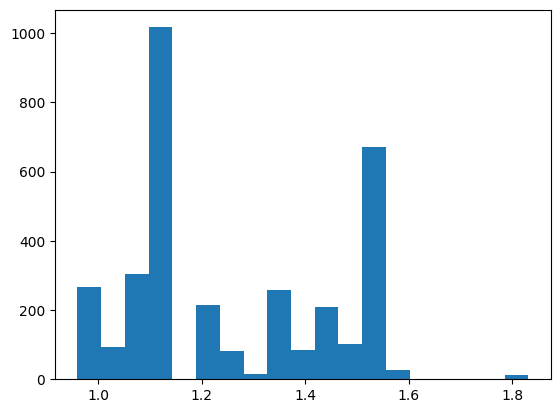

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(u.bonds.values(), bins="auto")

## Selecting specific bonds

Like atoms, it is rarely interesting to look at **all** bonds.
Instead, based on a tuple of atom types, we can select bonds between certain types of atoms.

In [72]:
u.atoms.types

array(['N', 'H', 'H', ..., 'C', 'O', 'O'], dtype=object)

In [73]:
u.bonds.types()

[('N', 'H'),
 ('N', 'C'),
 ('C', 'H'),
 ('C', 'C'),
 ('C', 'S'),
 ('C', 'O'),
 ('O', 'H'),
 ('S', 'H')]

In [74]:
u.bonds.select_bonds(('C', 'N'))

<TopologyGroup containing 531 bonds>

## Selecting main chain dihedrals

For polypeptides, it is also possible to select the atoms involved in the $\varphi$ (phi), $\psi$ (psi) and $\omega$ (omega) dihedrals.
These are acessed via the `phi_selection`, `psi_selection` and `omega_selection` methods of a **Residue**.

In [75]:
r = u.residues[1]
print(r)

<Residue ARG, 2>


In [76]:
print(r.phi_selection())
print(r.psi_selection())
print(r.omega_selection())

<AtomGroup [<Atom 18: C of type C of resname MET, resid 1 and segid 4AKE and altLoc >, <Atom 20: N of type N of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 22: CA of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 42: C of type C of resname ARG, resid 2 and segid 4AKE and altLoc >]>
<AtomGroup [<Atom 20: N of type N of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 22: CA of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 42: C of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 44: N of type N of resname ILE, resid 3 and segid 4AKE and altLoc >]>
<AtomGroup [<Atom 22: CA of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 42: C of type C of resname ARG, resid 2 and segid 4AKE and altLoc >, <Atom 44: N of type N of resname ILE, resid 3 and segid 4AKE and altLoc >, <Atom 46: CA of type C of resname ILE, resid 3 and segid 4AKE and altLoc >]>


These methods return `AtomGroup`s.  To turn a 4-member group into a dihedral, the `.dihedral` converting property can be used:

In [77]:
r.phi_selection().dihedral

<Dihedral between: Atom 17, Atom 19, Atom 21, Atom 41>

In [78]:
dih = r.phi_selection().dihedral

There are similar properties for casting **any** 2 atoms into a `Bond` (`AtomGroup.bond`) and casting **any** 3 atoms into an `Angle` (`AtomGroup.angle`).

In [79]:
u.atoms[[0, 2]].bond

<Bond between: Atom 0, Atom 2>

### Exercise 4

Calculate the angle between the C$\alpha$ atoms in the fifth, sixth and seventh residue.

In [80]:
## Solution

at1 = u.residues[4].atoms.select_atoms('name CA')
at2 = u.residues[5].atoms.select_atoms('name CA')
at3 = u.residues[6].atoms.select_atoms('name CA')

ag = at1 + at2 + at3

ag.angle.value()

125.1890032501002

# 5. Optional Tasks

- If you haven't already, read through the [selection documentation](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) and play around with all the selection options not covered above


- [nglview](https://github.com/nglviewer/nglview#usage) has a lot of visualisation options - you can add multiple selections to one view, change their colour and representation style and more - look through their documentaiton and see what you can create!